In [1]:
import numpy as np
from keras.layers import Input,Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
Ego = False
conv_size=(11,11,5,)
rest_size=(0*5+8,)
naction =  5
print(conv_size,naction,rest_size)
all_simu = np.load('ego:{}_simulation_26388_unique_E.npz'.format(Ego))
cnn_input,rest_input,y= all_simu['cnn_input'],all_simu['rest_input'],all_simu['y']

(11, 11, 5) 5 (8,)


In [15]:
np.bincount(np.array(y[:,0],dtype=int))

array([10993, 15395])

In [18]:
15395/(15395+10993)

0.5834091253600121

In [19]:
tttt = np.load('ego:False_simulation_200000.npz')

In [23]:
y = tttt['y']

In [26]:
np.bincount(np.array(y,dtype=np.int))

array([143227,  56773])

In [28]:
143227/np.sum([143227,  56773])

0.71613499999999997

In [13]:
np.bincount(y[:,0])

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [16]:
def Create_Model(input_shape=(613,)):
    x = Input(shape=input_shape)
    out = Dense(1, activation='sigmoid')(x)
    input_model = Model(inputs=[x],outputs=[out])
    input_model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
    return input_model
def Do_experiments(x,y,num_expr,epochs):
    input_history= np.zeros((num_expr,4,epochs))
    for i in range(num_expr):
        model = Create_Model((x.shape[1],))
        history = model.fit(x,y,epochs=epochs,batch_size=64,validation_split=0.2)
        input_history[i,0,:] = history.history['val_loss']
        input_history[i,1,:] = history.history['val_acc']
        input_history[i,2,:] = history.history['loss']
        input_history[i,3,:] = history.history['acc']
    return input_history

In [12]:
x_input = np.concatenate([cnn_input.reshape((26388,-1)),rest_input],axis=1)

In [13]:
x_FC1 = np.load('FC1_data.npy')
x_FC2 = np.load('FC2_data.npy')
x_LSTM = np.load('LSTM_data.npy')
x_FINAL = np.load('final.npy')

In [14]:
num_expr = 20
epochs=20
input_history= Do_experiments(x_input,y,20,20)

Train on 21110 samples, validate on 5278 samples
Epoch 1/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6827 - acc: 0.5798 - val_loss: 0.6798 - val_acc: 0.5853
Epoch 2/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6820 - acc: 0.5794 - val_loss: 0.6806 - val_acc: 0.5853
Epoch 3/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6819 - acc: 0.5814 - val_loss: 0.6800 - val_acc: 0.5853
Epoch 4/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6812 - acc: 0.5828 - val_loss: 0.6802 - val_acc: 0.5853
Epoch 5/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6812 - acc: 0.5825 - val_loss: 0.6880 - val_acc: 0.5803
Epoch 6/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6813 - acc: 0.5827 - val_loss: 0.6804 - val_acc: 0.5853
Epoch 7/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6824 - acc: 0.5797 - val_loss: 0.6819 - val_acc:

21110/21110 [==============================] - 1s 27us/step - loss: 0.6814 - acc: 0.5828 - val_loss: 0.6809 - val_acc: 0.5853
Epoch 18/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6812 - acc: 0.5821 - val_loss: 0.6812 - val_acc: 0.5853
Epoch 19/20
21110/21110 [==============================] - 1s 38us/step - loss: 0.6812 - acc: 0.5829 - val_loss: 0.6862 - val_acc: 0.5853
Epoch 20/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6810 - acc: 0.5827 - val_loss: 0.6832 - val_acc: 0.5853
Train on 21110 samples, validate on 5278 samples
Epoch 1/20
21110/21110 [==============================] - 1s 38us/step - loss: 0.6827 - acc: 0.5813 - val_loss: 0.6791 - val_acc: 0.5853
Epoch 2/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6820 - acc: 0.5832 - val_loss: 0.6868 - val_acc: 0.5784
Epoch 3/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6821 - acc: 0.5811 - val_loss: 0.6797 - val_acc: 0.5853


21110/21110 [==============================] - 1s 28us/step - loss: 0.6808 - acc: 0.5832 - val_loss: 0.6822 - val_acc: 0.5853
Epoch 14/20
21110/21110 [==============================] - 1s 30us/step - loss: 0.6811 - acc: 0.5828 - val_loss: 0.6831 - val_acc: 0.5853
Epoch 15/20
21110/21110 [==============================] - 1s 29us/step - loss: 0.6812 - acc: 0.5830 - val_loss: 0.6879 - val_acc: 0.5800
Epoch 16/20
21110/21110 [==============================] - 1s 29us/step - loss: 0.6806 - acc: 0.5823 - val_loss: 0.6862 - val_acc: 0.5853
Epoch 17/20
21110/21110 [==============================] - 1s 33us/step - loss: 0.6814 - acc: 0.5831 - val_loss: 0.6808 - val_acc: 0.5853
Epoch 18/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6810 - acc: 0.5830 - val_loss: 0.6807 - val_acc: 0.5853
Epoch 19/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6807 - acc: 0.5824 - val_loss: 0.6807 - val_acc: 0.5853
Epoch 20/20
21110/21110 [=====================

21110/21110 [==============================] - 1s 28us/step - loss: 0.6813 - acc: 0.5830 - val_loss: 0.6835 - val_acc: 0.5853
Epoch 10/20
21110/21110 [==============================] - 1s 30us/step - loss: 0.6819 - acc: 0.5829 - val_loss: 0.6841 - val_acc: 0.5853
Epoch 11/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6809 - acc: 0.5829 - val_loss: 0.6806 - val_acc: 0.5853
Epoch 12/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6812 - acc: 0.5827 - val_loss: 0.6810 - val_acc: 0.5853
Epoch 13/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6810 - acc: 0.5829 - val_loss: 0.6841 - val_acc: 0.5853
Epoch 14/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6813 - acc: 0.5832 - val_loss: 0.6806 - val_acc: 0.5853
Epoch 15/20
21110/21110 [==============================] - 1s 36us/step - loss: 0.6810 - acc: 0.5794 - val_loss: 0.6813 - val_acc: 0.5853
Epoch 16/20
21110/21110 [=====================

In [21]:
FC1_history=Do_experiments(x_FC1,y,20,20)

Train on 21110 samples, validate on 5278 samples
Epoch 1/20
21110/21110 [==============================] - 1s 48us/step - loss: 0.7201 - acc: 0.5553 - val_loss: 0.6848 - val_acc: 0.5794
Epoch 2/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6751 - acc: 0.5901 - val_loss: 0.6609 - val_acc: 0.6034
Epoch 3/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6603 - acc: 0.6123 - val_loss: 0.6499 - val_acc: 0.6283
Epoch 4/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6532 - acc: 0.6303 - val_loss: 0.6445 - val_acc: 0.6377
Epoch 5/20
21110/21110 [==============================] - 1s 30us/step - loss: 0.6499 - acc: 0.6338 - val_loss: 0.6420 - val_acc: 0.6419
Epoch 6/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6484 - acc: 0.6347 - val_loss: 0.6410 - val_acc: 0.6461
Epoch 7/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6472 - acc: 0.6367 - val_loss: 0.6400 - val_acc:

21110/21110 [==============================] - 1s 26us/step - loss: 0.6451 - acc: 0.6383 - val_loss: 0.6378 - val_acc: 0.6457
Epoch 18/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6450 - acc: 0.6372 - val_loss: 0.6375 - val_acc: 0.6497
Epoch 19/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6450 - acc: 0.6377 - val_loss: 0.6376 - val_acc: 0.6427
Epoch 20/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6451 - acc: 0.6373 - val_loss: 0.6377 - val_acc: 0.6434
Train on 21110 samples, validate on 5278 samples
Epoch 1/20
21110/21110 [==============================] - 1s 66us/step - loss: 0.7360 - acc: 0.5294 - val_loss: 0.6905 - val_acc: 0.5629
Epoch 2/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6801 - acc: 0.5682 - val_loss: 0.6650 - val_acc: 0.5953
Epoch 3/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6632 - acc: 0.5963 - val_loss: 0.6523 - val_acc: 0.6116


21110/21110 [==============================] - 1s 27us/step - loss: 0.6460 - acc: 0.6356 - val_loss: 0.6390 - val_acc: 0.6434
Epoch 14/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6459 - acc: 0.6378 - val_loss: 0.6387 - val_acc: 0.6453
Epoch 15/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6457 - acc: 0.6384 - val_loss: 0.6380 - val_acc: 0.6523
Epoch 16/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6457 - acc: 0.6351 - val_loss: 0.6380 - val_acc: 0.6523
Epoch 17/20
21110/21110 [==============================] - 1s 26us/step - loss: 0.6457 - acc: 0.6376 - val_loss: 0.6382 - val_acc: 0.6427
Epoch 18/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6457 - acc: 0.6380 - val_loss: 0.6384 - val_acc: 0.6436
Epoch 19/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6458 - acc: 0.6340 - val_loss: 0.6381 - val_acc: 0.6461
Epoch 20/20
21110/21110 [=====================

21110/21110 [==============================] - 1s 28us/step - loss: 0.6477 - acc: 0.6350 - val_loss: 0.6410 - val_acc: 0.6478
Epoch 10/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6472 - acc: 0.6339 - val_loss: 0.6405 - val_acc: 0.6493
Epoch 11/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6471 - acc: 0.6363 - val_loss: 0.6402 - val_acc: 0.6415
Epoch 12/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6469 - acc: 0.6332 - val_loss: 0.6400 - val_acc: 0.6417
Epoch 13/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6468 - acc: 0.6349 - val_loss: 0.6393 - val_acc: 0.6421
Epoch 14/20
21110/21110 [==============================] - 1s 29us/step - loss: 0.6465 - acc: 0.6351 - val_loss: 0.6392 - val_acc: 0.6425
Epoch 15/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6465 - acc: 0.6362 - val_loss: 0.6397 - val_acc: 0.6415
Epoch 16/20
21110/21110 [=====================

In [22]:
FC2_history=Do_experiments(x_FC2,y,20,20)

Train on 21110 samples, validate on 5278 samples
Epoch 1/20
21110/21110 [==============================] - 2s 96us/step - loss: 0.7962 - acc: 0.5540 - val_loss: 0.7067 - val_acc: 0.5731
Epoch 2/20
21110/21110 [==============================] - 1s 30us/step - loss: 0.6821 - acc: 0.5813 - val_loss: 0.6678 - val_acc: 0.5906
Epoch 3/20
21110/21110 [==============================] - 1s 29us/step - loss: 0.6627 - acc: 0.6002 - val_loss: 0.6545 - val_acc: 0.6108
Epoch 4/20
21110/21110 [==============================] - 1s 36us/step - loss: 0.6551 - acc: 0.6145 - val_loss: 0.6489 - val_acc: 0.6336
Epoch 5/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6514 - acc: 0.6246 - val_loss: 0.6443 - val_acc: 0.6336
Epoch 6/20
21110/21110 [==============================] - 1s 28us/step - loss: 0.6492 - acc: 0.6304 - val_loss: 0.6421 - val_acc: 0.6376
Epoch 7/20
21110/21110 [==============================] - 1s 27us/step - loss: 0.6477 - acc: 0.6320 - val_loss: 0.6439 - val_acc:

21110/21110 [==============================] - 1s 51us/step - loss: 0.6454 - acc: 0.6380 - val_loss: 0.6378 - val_acc: 0.6504
Epoch 18/20
21110/21110 [==============================] - 1s 51us/step - loss: 0.6455 - acc: 0.6371 - val_loss: 0.6377 - val_acc: 0.6493
Epoch 19/20
21110/21110 [==============================] - 1s 51us/step - loss: 0.6456 - acc: 0.6375 - val_loss: 0.6376 - val_acc: 0.6518
Epoch 20/20
21110/21110 [==============================] - 1s 52us/step - loss: 0.6454 - acc: 0.6401 - val_loss: 0.6379 - val_acc: 0.6472
Train on 21110 samples, validate on 5278 samples
Epoch 1/20
21110/21110 [==============================] - 2s 102us/step - loss: 0.7316 - acc: 0.5493 - val_loss: 0.6853 - val_acc: 0.5853
Epoch 2/20
21110/21110 [==============================] - 1s 45us/step - loss: 0.6789 - acc: 0.5912 - val_loss: 0.6614 - val_acc: 0.6222
Epoch 3/20
21110/21110 [==============================] - 1s 46us/step - loss: 0.6627 - acc: 0.6192 - val_loss: 0.6505 - val_acc: 0.6286

21110/21110 [==============================] - 1s 47us/step - loss: 0.6460 - acc: 0.6378 - val_loss: 0.6390 - val_acc: 0.6453
Epoch 14/20
21110/21110 [==============================] - 1s 47us/step - loss: 0.6460 - acc: 0.6360 - val_loss: 0.6391 - val_acc: 0.6438
Epoch 15/20
21110/21110 [==============================] - 1s 52us/step - loss: 0.6458 - acc: 0.6356 - val_loss: 0.6384 - val_acc: 0.6508
Epoch 16/20
21110/21110 [==============================] - 1s 52us/step - loss: 0.6457 - acc: 0.6366 - val_loss: 0.6383 - val_acc: 0.6485
Epoch 17/20
21110/21110 [==============================] - 1s 51us/step - loss: 0.6457 - acc: 0.6375 - val_loss: 0.6391 - val_acc: 0.6455
Epoch 18/20
21110/21110 [==============================] - 1s 49us/step - loss: 0.6459 - acc: 0.6353 - val_loss: 0.6389 - val_acc: 0.6440
Epoch 19/20
21110/21110 [==============================] - 1s 52us/step - loss: 0.6458 - acc: 0.6365 - val_loss: 0.6381 - val_acc: 0.6468
Epoch 20/20
21110/21110 [=====================

21110/21110 [==============================] - 1s 53us/step - loss: 0.6468 - acc: 0.6344 - val_loss: 0.6401 - val_acc: 0.6497
Epoch 10/20
21110/21110 [==============================] - 1s 52us/step - loss: 0.6463 - acc: 0.6363 - val_loss: 0.6396 - val_acc: 0.6448
Epoch 11/20
21110/21110 [==============================] - 1s 54us/step - loss: 0.6463 - acc: 0.6354 - val_loss: 0.6395 - val_acc: 0.6459
Epoch 12/20
21110/21110 [==============================] - 1s 50us/step - loss: 0.6459 - acc: 0.6369 - val_loss: 0.6391 - val_acc: 0.6442
Epoch 13/20
21110/21110 [==============================] - 1s 51us/step - loss: 0.6458 - acc: 0.6366 - val_loss: 0.6385 - val_acc: 0.6506
Epoch 14/20
21110/21110 [==============================] - 1s 47us/step - loss: 0.6456 - acc: 0.6377 - val_loss: 0.6386 - val_acc: 0.6502
Epoch 15/20
21110/21110 [==============================] - 1s 55us/step - loss: 0.6455 - acc: 0.6366 - val_loss: 0.6394 - val_acc: 0.6442
Epoch 16/20
21110/21110 [=====================

In [23]:
LSTM_history=Do_experiments(x_LSTM,y,20,20)

Train on 21110 samples, validate on 5278 samples
Epoch 1/20
21110/21110 [==============================] - 3s 123us/step - loss: 0.7099 - acc: 0.5636 - val_loss: 0.6776 - val_acc: 0.5928
Epoch 2/20
21110/21110 [==============================] - 1s 50us/step - loss: 0.6696 - acc: 0.6063 - val_loss: 0.6573 - val_acc: 0.6226
Epoch 3/20
21110/21110 [==============================] - 1s 53us/step - loss: 0.6571 - acc: 0.6246 - val_loss: 0.6485 - val_acc: 0.6374
Epoch 4/20
21110/21110 [==============================] - 1s 52us/step - loss: 0.6516 - acc: 0.6305 - val_loss: 0.6440 - val_acc: 0.6313
Epoch 5/20
21110/21110 [==============================] - 1s 52us/step - loss: 0.6490 - acc: 0.6318 - val_loss: 0.6418 - val_acc: 0.6487
Epoch 6/20
21110/21110 [==============================] - 1s 53us/step - loss: 0.6476 - acc: 0.6354 - val_loss: 0.6402 - val_acc: 0.6427
Epoch 7/20
21110/21110 [==============================] - 1s 53us/step - loss: 0.6469 - acc: 0.6351 - val_loss: 0.6400 - val_acc

21110/21110 [==============================] - 1s 57us/step - loss: 0.6457 - acc: 0.6373 - val_loss: 0.6380 - val_acc: 0.6466
Epoch 18/20
21110/21110 [==============================] - 1s 54us/step - loss: 0.6456 - acc: 0.6375 - val_loss: 0.6381 - val_acc: 0.6463
Epoch 19/20
21110/21110 [==============================] - 1s 54us/step - loss: 0.6456 - acc: 0.6371 - val_loss: 0.6379 - val_acc: 0.6485
Epoch 20/20
21110/21110 [==============================] - 1s 55us/step - loss: 0.6458 - acc: 0.6351 - val_loss: 0.6380 - val_acc: 0.6499
Train on 21110 samples, validate on 5278 samples
Epoch 1/20
21110/21110 [==============================] - 3s 126us/step - loss: 0.7544 - acc: 0.5520 - val_loss: 0.7039 - val_acc: 0.5483
Epoch 2/20
21110/21110 [==============================] - 1s 50us/step - loss: 0.6926 - acc: 0.5597 - val_loss: 0.6731 - val_acc: 0.5900
Epoch 3/20
21110/21110 [==============================] - 1s 55us/step - loss: 0.6709 - acc: 0.5897 - val_loss: 0.6576 - val_acc: 0.6171

21110/21110 [==============================] - 1s 54us/step - loss: 0.6461 - acc: 0.6338 - val_loss: 0.6390 - val_acc: 0.6404
Epoch 14/20
21110/21110 [==============================] - 1s 54us/step - loss: 0.6462 - acc: 0.6361 - val_loss: 0.6382 - val_acc: 0.6455
Epoch 15/20
21110/21110 [==============================] - 1s 45us/step - loss: 0.6461 - acc: 0.6351 - val_loss: 0.6387 - val_acc: 0.6453
Epoch 16/20
21110/21110 [==============================] - 1s 56us/step - loss: 0.6458 - acc: 0.6371 - val_loss: 0.6390 - val_acc: 0.6404
Epoch 17/20
21110/21110 [==============================] - 1s 56us/step - loss: 0.6459 - acc: 0.6355 - val_loss: 0.6394 - val_acc: 0.6451
Epoch 18/20
21110/21110 [==============================] - 1s 57us/step - loss: 0.6461 - acc: 0.6339 - val_loss: 0.6380 - val_acc: 0.6478
Epoch 19/20
21110/21110 [==============================] - 1s 55us/step - loss: 0.6459 - acc: 0.6366 - val_loss: 0.6382 - val_acc: 0.6438
Epoch 20/20
21110/21110 [=====================

21110/21110 [==============================] - 1s 50us/step - loss: 0.6459 - acc: 0.6348 - val_loss: 0.6387 - val_acc: 0.6476
Epoch 10/20
21110/21110 [==============================] - 1s 53us/step - loss: 0.6457 - acc: 0.6373 - val_loss: 0.6383 - val_acc: 0.6449
Epoch 11/20
21110/21110 [==============================] - 1s 53us/step - loss: 0.6456 - acc: 0.6369 - val_loss: 0.6385 - val_acc: 0.6385
Epoch 12/20
21110/21110 [==============================] - 1s 54us/step - loss: 0.6452 - acc: 0.6355 - val_loss: 0.6383 - val_acc: 0.6489
Epoch 13/20
21110/21110 [==============================] - 1s 45us/step - loss: 0.6454 - acc: 0.6387 - val_loss: 0.6378 - val_acc: 0.6485
Epoch 14/20
21110/21110 [==============================] - 1s 50us/step - loss: 0.6453 - acc: 0.6365 - val_loss: 0.6376 - val_acc: 0.6516
Epoch 15/20
21110/21110 [==============================] - 1s 52us/step - loss: 0.6453 - acc: 0.6400 - val_loss: 0.6375 - val_acc: 0.6518
Epoch 16/20
21110/21110 [=====================

In [24]:
final_history=Do_experiments(x_FINAL,y,20,20)

Train on 21110 samples, validate on 5278 samples
Epoch 1/20
21110/21110 [==============================] - 3s 130us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 2/20
21110/21110 [==============================] - 1s 37us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 3/20
21110/21110 [==============================] - 1s 49us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 4/20
21110/21110 [==============================] - 1s 53us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 5/20
21110/21110 [==============================] - 1s 54us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 6/20
21110/21110 [==============================] - 1s 52us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 7/20
21110/21110 [==============================] - 1s 51us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc

21110/21110 [==============================] - 1s 52us/step - loss: 0.5933 - acc: 0.9015 - val_loss: 0.6008 - val_acc: 0.8984
Epoch 18/20
21110/21110 [==============================] - 1s 53us/step - loss: 0.5911 - acc: 0.9014 - val_loss: 0.6231 - val_acc: 0.8765
Epoch 19/20
21110/21110 [==============================] - 1s 50us/step - loss: 0.5782 - acc: 0.9044 - val_loss: 0.5954 - val_acc: 0.9070
Epoch 20/20
21110/21110 [==============================] - 1s 53us/step - loss: 0.5754 - acc: 0.9052 - val_loss: 0.5865 - val_acc: 0.8967
Train on 21110 samples, validate on 5278 samples
Epoch 1/20
21110/21110 [==============================] - 3s 124us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 2/20
21110/21110 [==============================] - 1s 43us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 3/20
21110/21110 [==============================] - 1s 56us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853

21110/21110 [==============================] - 1s 54us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 14/20
21110/21110 [==============================] - 1s 54us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 15/20
21110/21110 [==============================] - 1s 54us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 16/20
21110/21110 [==============================] - 1s 50us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 17/20
21110/21110 [==============================] - 1s 45us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 18/20
21110/21110 [==============================] - 1s 54us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 19/20
21110/21110 [==============================] - 1s 55us/step - loss: 6.6488 - acc: 0.5829 - val_loss: 6.6120 - val_acc: 0.5853
Epoch 20/20
21110/21110 [=====================

21110/21110 [==============================] - 1s 52us/step - loss: 9.3952 - acc: 0.4171 - val_loss: 9.4333 - val_acc: 0.4147
Epoch 10/20
21110/21110 [==============================] - 1s 51us/step - loss: 9.3952 - acc: 0.4171 - val_loss: 9.4333 - val_acc: 0.4147
Epoch 11/20
21110/21110 [==============================] - 1s 54us/step - loss: 9.3952 - acc: 0.4171 - val_loss: 9.4333 - val_acc: 0.4147
Epoch 12/20
21110/21110 [==============================] - 1s 49us/step - loss: 9.3952 - acc: 0.4171 - val_loss: 9.4333 - val_acc: 0.4147
Epoch 13/20
21110/21110 [==============================] - 1s 56us/step - loss: 9.3952 - acc: 0.4171 - val_loss: 9.4333 - val_acc: 0.4147
Epoch 14/20
21110/21110 [==============================] - 1s 52us/step - loss: 9.3952 - acc: 0.4171 - val_loss: 9.4333 - val_acc: 0.4147
Epoch 15/20
21110/21110 [==============================] - 1s 55us/step - loss: 9.3952 - acc: 0.4171 - val_loss: 9.4333 - val_acc: 0.4147
Epoch 16/20
21110/21110 [=====================

In [25]:
np.savez('decoder_history.npz',input_history=input_history,FC1_history=FC1_history,FC2_history=FC2_history,LSTM_history=LSTM_history,final_history=final_history)

In [3]:
data = np.load('decoder_history.npz')
input_history=data['input_history']
FC1_history=data['FC1_history']
FC2_history=data['FC2_history']
LSTM_history=data['LSTM_history']
final_history=data['final_history']

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def calculate(val,index):
    mean = np.mean(val[:,index,:],axis=0)
    std = np.std(val[:,index,:],axis=0)
    return mean,std/np.sqrt(20)

def draw(tag='val_acc'):
    plt.figure(figsize=(13,7))
    ls = [input_history,FC1_history,FC2_history,LSTM_history,final_history]
    colors = ['blue','red','black','g','m']
    labels = ['input','FC1','FC2','LSTM','output']
    tag_manual={'val_loss':0,'val_acc':1,'loss':2,'acc':3}
    ax= plt.subplot(1,1,1)
    ax.set_title(tag)
    for i in range(5):
        element=ls[i]
        avlm,avls = calculate(element,tag_manual[tag])
        ax.plot(np.arange(20),avlm,color=colors[i],label=labels[i])
        ax.fill_between(np.arange(20),avlm+avls,avlm-avls,alpha=0.2)
        ax.set_xticks(np.arange(20),minor=True)
        ax.legend()

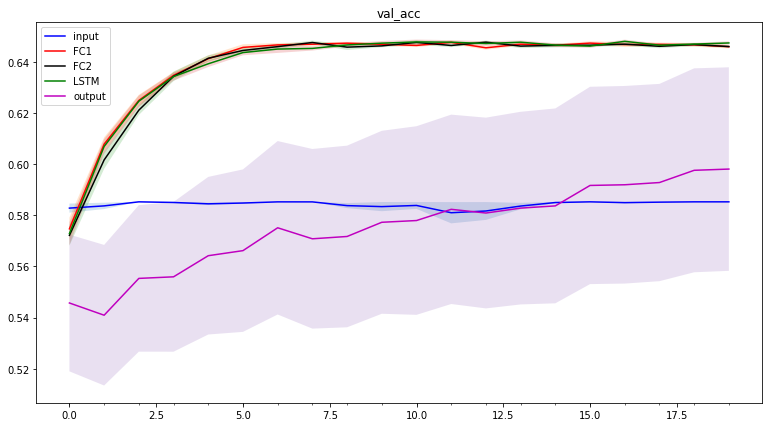

In [10]:
draw(tag='val_acc')